In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for better visuals
sns.set(style='whitegrid')

# Load the cleaned dataset
df = pd.read_csv('../data/epl_cleaned.csv')

# Preview the first few rows
df.head()

,Season,DateTime,HomeTeam,AwayTeam,HomeGoals,AwayGoals,FullTimeResult,HS,AS,HST,...,HC,AC,HF,AF,HY,AY,HR,AR,TotalGoals,MatchOutcome
0,1993-94,1993-08-14T00:00:00Z,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,Away Win
1,1993-94,1993-08-14T00:00:00Z,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,Home Win
2,1993-94,1993-08-14T00:00:00Z,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,Away Win
3,1993-94,1993-08-14T00:00:00Z,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Home Win
4,1993-94,1993-08-14T00:00:00Z,Man City,Leeds,1,1,D,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Draw


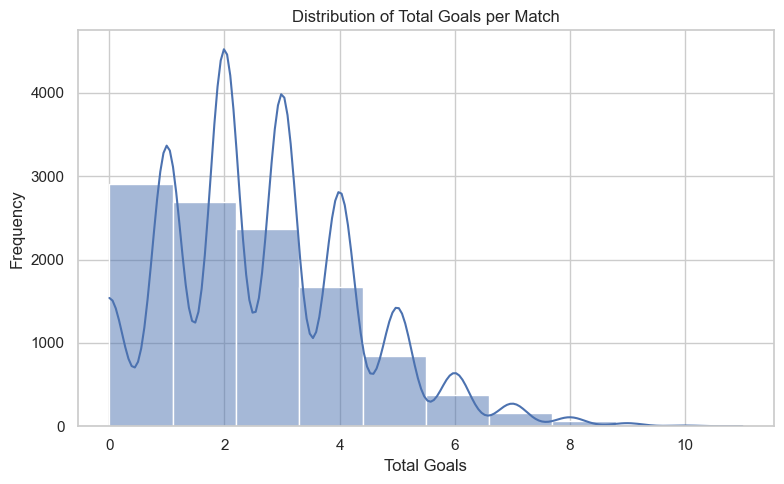

In [2]:
# Plot the distribution of total goals per match
plt.figure(figsize=(8, 5))
sns.histplot(df['TotalGoals'], bins=10, kde=True)
plt.title('Distribution of Total Goals per Match')
plt.xlabel('Total Goals')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_19388\3718420700.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='MatchOutcome', data=df, palette='pastel')


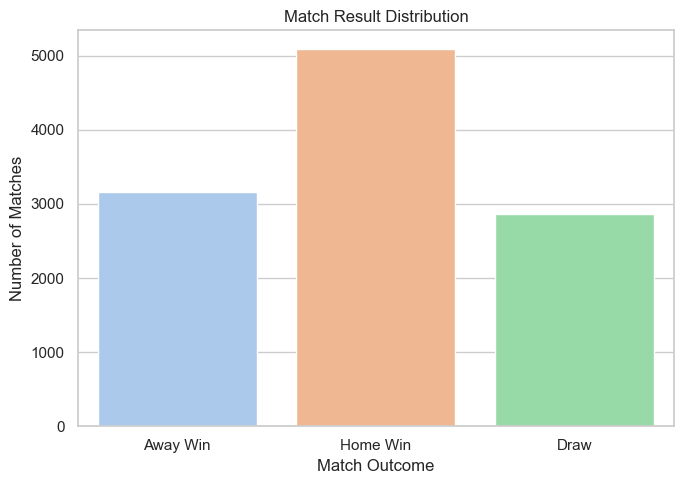

In [3]:
# Count plot showing number of matches ending in Home Win, Away Win, or Draw
plt.figure(figsize=(7, 5))
sns.countplot(x='MatchOutcome', data=df, palette='pastel')
plt.title('Match Result Distribution')
plt.xlabel('Match Outcome')
plt.ylabel('Number of Matches')
plt.tight_layout()
plt.show()

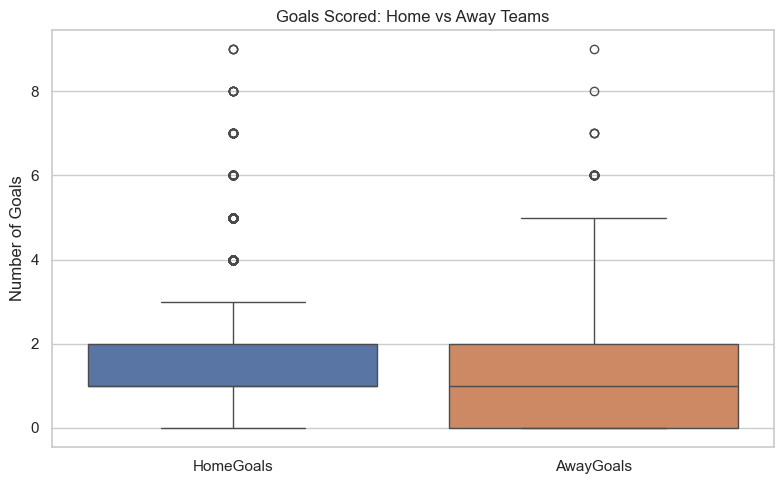

In [4]:
# Box plot comparing goals scored by home and away teams
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[['HomeGoals', 'AwayGoals']])
plt.title('Goals Scored: Home vs Away Teams')
plt.ylabel('Number of Goals')
plt.tight_layout()
plt.show()

In [5]:
# Sort the dataframe by TotalGoals in descending order and show top 10
top_goal_matches = df.sort_values(by='TotalGoals', ascending=False).head(10)
top_goal_matches[['HomeTeam', 'AwayTeam', 'HomeGoals', 'AwayGoals', 'TotalGoals']]

,HomeTeam,AwayTeam,HomeGoals,AwayGoals,TotalGoals
5555,Portsmouth,Reading,7,4,11
7572,Arsenal,Newcastle,7,3,10
7761,West Brom,Man United,5,5,10
7029,Man United,Arsenal,8,2,10
5678,Tottenham,Reading,6,4,10
6370,Tottenham,Wigan,9,1,10
10973,Man City,Leicester,6,3,9
1408,Southampton,Man United,6,3,9
7918,Man City,Arsenal,6,3,9
787,Man United,Ipswich,9,0,9


C:\Users\admin\AppData\Local\Temp\ipykernel_19388\3884985507.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=home_counts.values, y=home_counts.index, ax=axes[0], palette='Blues_d')
C:\Users\admin\AppData\Local\Temp\ipykernel_19388\3884985507.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=away_counts.values, y=away_counts.index, ax=axes[1], palette='Greens_d')


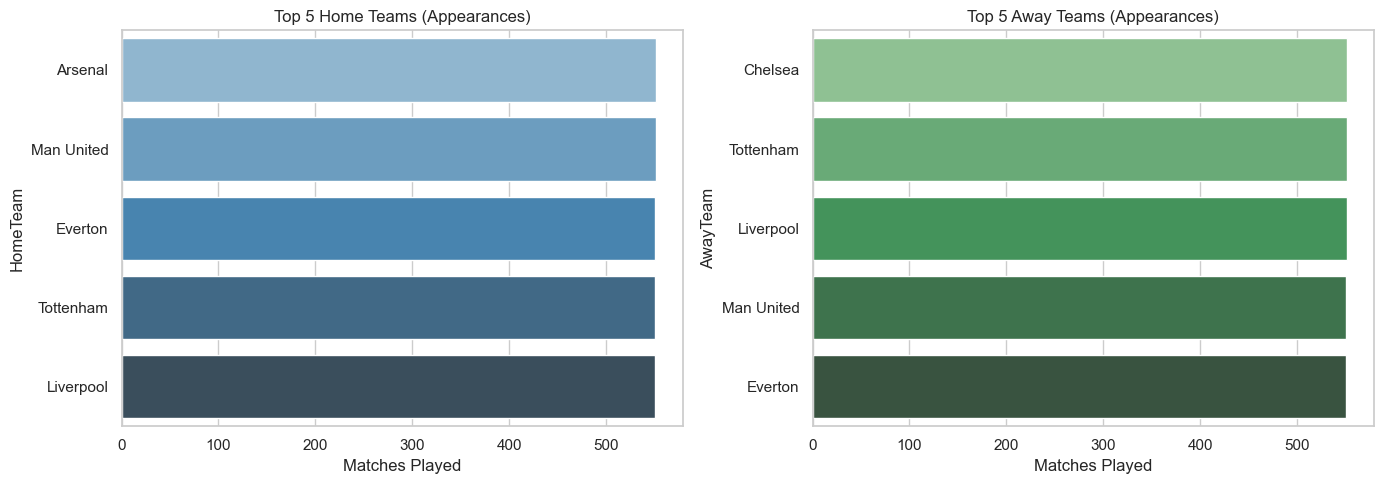

In [6]:
# Display the most common teams (appearances) as Home and Away
home_counts = df['HomeTeam'].value_counts().head(5)
away_counts = df['AwayTeam'].value_counts().head(5)

# Plot side by side bar charts
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.barplot(x=home_counts.values, y=home_counts.index, ax=axes[0], palette='Blues_d')
axes[0].set_title('Top 5 Home Teams (Appearances)')
axes[0].set_xlabel('Matches Played')

sns.barplot(x=away_counts.values, y=away_counts.index, ax=axes[1], palette='Greens_d')
axes[1].set_title('Top 5 Away Teams (Appearances)')
axes[1].set_xlabel('Matches Played')

plt.tight_layout()
plt.show()

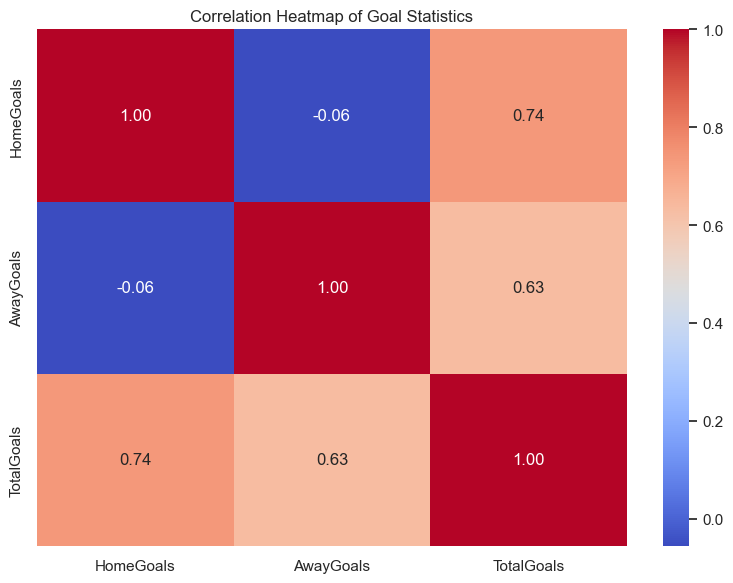

In [7]:
# Display correlation between numerical columns using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['HomeGoals', 'AwayGoals', 'TotalGoals']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Goal Statistics')
plt.tight_layout()
plt.show()